# <font color=darkpink>Airbnb Berlin</font>

This script contains the following points:

1. Import libraries


2. Import data


3. Data cleaning


4. Explore relationships
   * Correlations    
     - correlation matrix heatmap
   * Scatterplots

   * Pair Plots

   * Categorical Plots
   

5. Answer to the generated questions


6. New questions to explore


7. Hypothesis


8. Export data


9. Export charts

** **

## 1. Import libraries

In [1]:
# Import Libraries 

import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy

## 2. Import data

In [2]:
path = r'/Users/berk/Airbnb_Berlin'

In [3]:
# Import data

df_list = pd.read_csv(os.path.join(path, 'Data', 'Prepared_Data', 'list_cleaned.csv'), index_col = False)

## 3. Data cleaning

In [4]:
df_list.shape

(6065, 19)

In [5]:
df_list.columns

Index(['Unnamed: 0', 'listing_id', 'listing_name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'review_in_the_last_year', 'license'],
      dtype='object')

In [6]:
# Renaming some columns 

df_list.rename(columns = {'neighbourhood_group':'district', 'calculated_host_listings_count': 'host_total_listings'}, inplace = True)

In [7]:
df_list.dtypes

Unnamed: 0                   int64
listing_id                   int64
listing_name                object
host_id                      int64
host_name                   object
district                    object
neighbourhood               object
latitude                   float64
longitude                  float64
room_type                   object
price                        int64
minimum_nights               int64
number_of_reviews            int64
last_review                 object
reviews_per_month          float64
host_total_listings          int64
availability_365             int64
review_in_the_last_year      int64
license                     object
dtype: object

In [8]:
df_list.head()

,Unnamed: 0,listing_id,listing_name,host_id,host_name,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_total_listings,availability_365,review_in_the_last_year,license
0,0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,147,2021-01-01,0.88,1,303,0,First name and Last name: Nicolas Krotz Conta...
1,1,251423,2-room I 50 m² I Comfort I Balcony,1023063,Raja Jooseppi,Mitte,Brunnenstr. Nord,52.53867,13.39712,Entire home/apt,100,3,14,2023-01-29,0.11,8,93,10,01/Z/NA/003420-15
2,2,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.09,1,0,0,03/Z/RA/003410-18
3,3,251486,I 2 Room I 41 m² I Balcony,1023063,Raja Jooseppi,Mitte,Brunnenstr. Süd,52.53667,13.39505,Entire home/apt,108,3,31,2023-03-14,0.24,8,104,28,01/Z/ZA/006181-16
4,4,251493,2-room I 41 m² I Terrace > Mitte,1023063,Raja Jooseppi,Mitte,Brunnenstr. Nord,52.53881,13.39654,Entire home/apt,98,3,15,2023-02-26,0.12,8,98,13,01/Z/ZA/006180-16


#### Missing Values Check:

In [9]:
# Check for missing values

df_list.isnull().sum() 

Unnamed: 0                 0
listing_id                 0
listing_name               0
host_id                    0
host_name                  0
district                   0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review                0
reviews_per_month          0
host_total_listings        0
availability_365           0
review_in_the_last_year    0
license                    0
dtype: int64

In [10]:
# Remove 'Unnamed' column as it is irrelevant for analysis

df_list = df_list.drop("Unnamed: 0", axis=1)

In [11]:
df_list.dtypes

listing_id                   int64
listing_name                object
host_id                      int64
host_name                   object
district                    object
neighbourhood               object
latitude                   float64
longitude                  float64
room_type                   object
price                        int64
minimum_nights               int64
number_of_reviews            int64
last_review                 object
reviews_per_month          float64
host_total_listings          int64
availability_365             int64
review_in_the_last_year      int64
license                     object
dtype: object

In [12]:
# Observe the statistical values of price

df_list['price'].describe()

count     6065.000000
mean       138.229843
std       1167.926782
min         13.000000
25%         65.000000
50%         95.000000
75%        144.000000
max      89105.000000
Name: price, dtype: float64

## 4. Explore relationships

### Correlations

In [13]:
# Create a subset

sub = df_list[['price', 'minimum_nights', 'number_of_reviews','reviews_per_month',
                    'host_total_listings','availability_365','review_in_the_last_year']]

In [14]:
# Create a correlation matrix using pandas

sub.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,host_total_listings,availability_365,review_in_the_last_year
price,1.000000,0.009843,-0.006202,-0.013248,0.006168,0.026775,-0.014443
minimum_nights,0.009843,1.000000,-0.053466,-0.092072,0.010140,0.028877,-0.090143
number_of_reviews,-0.006202,-0.053466,1.000000,0.640709,-0.042008,0.092394,0.737462
reviews_per_month,-0.013248,-0.092072,0.640709,1.000000,0.026445,0.166009,0.849654
host_total_listings,0.006168,0.010140,-0.042008,0.026445,1.000000,0.235902,0.006437
availability_365,0.026775,0.028877,0.092394,0.166009,0.235902,1.000000,0.171744
review_in_the_last_year,-0.014443,-0.090143,0.737462,0.849654,0.006437,0.171744,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

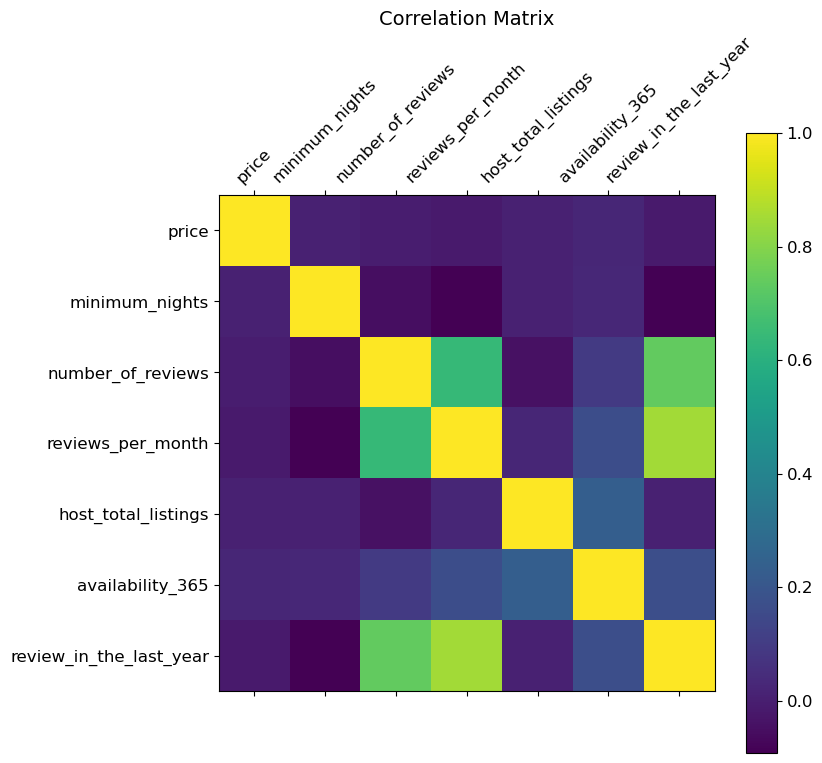

In [15]:
# Create a correlation heatmap using matplotlib
# Adding labels, a legend, and change the size of the heatmap

f = plt.figure(figsize = (8,8)) # figure size
plt.matshow(sub.corr(), fignum = f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize = 12, rotation = 45 ) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize = 12) # y axis labels
cb = plt. colorbar() # add a color legend called colorbar
cb.ax.tick_params(labelsize = 12) # add font size
plt.title('Correlation Matrix', fontsize = 14) # add title

#### Create a correlation heatmap using seaborn:

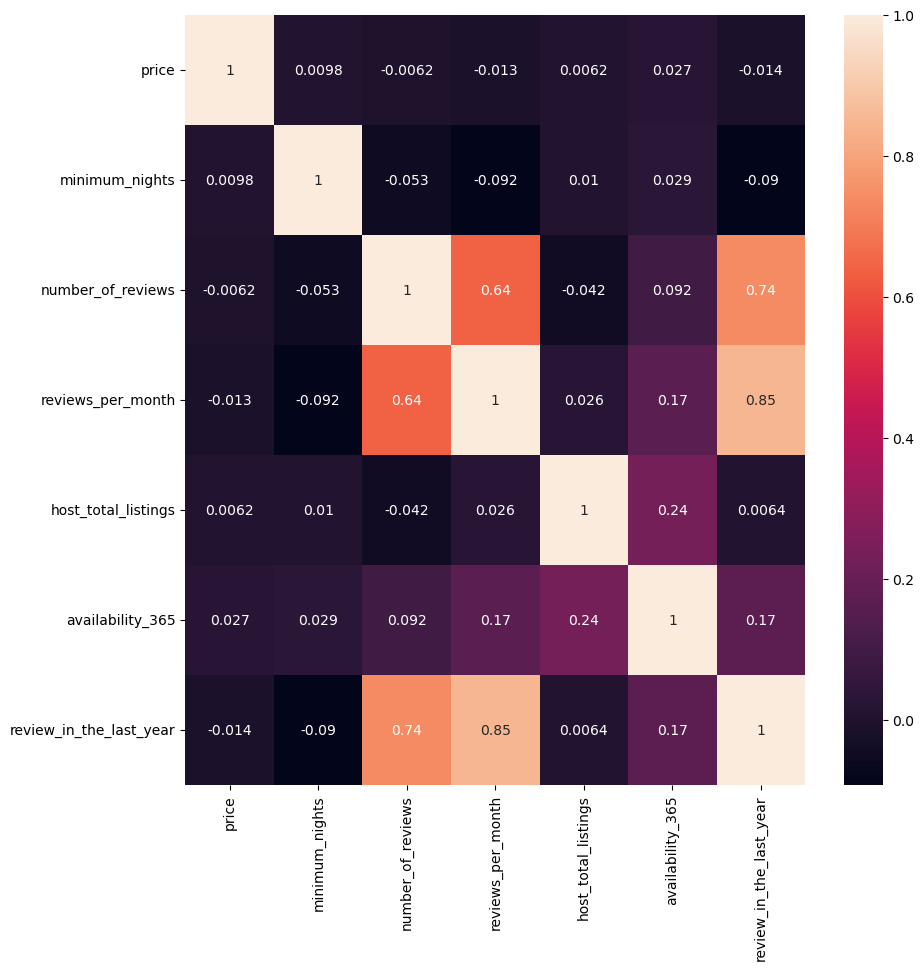

In [16]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize = (10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 

# Place the correlation coefficients onto the heatmap.

Based on the heatmap provided, I can suggest exploring the factors that influence the pricing of Airbnb listings. Although the correlations between price and other variables are not particularly strong.

It is worth noting that there is generally a low correlation between many of the variables in the table. However, it is unsurprising that "number_of_reviews", "reviews_per_month" and "review_in_the_last_year" are highly correlated, as they are closely related.

### Scatterplots

(0.0, 500.0)

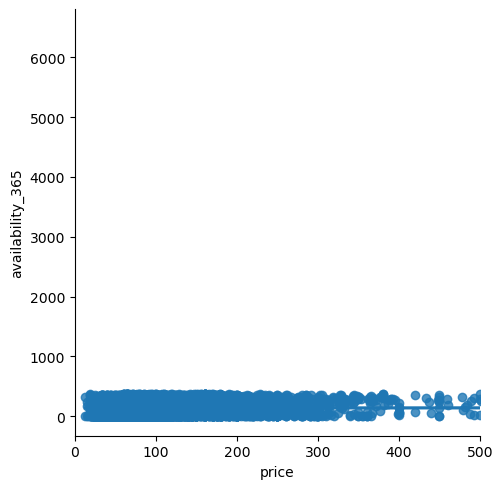

In [17]:
# Create a scatterplot for the 'price' and 'availability_365' columns in seaborn to determine if they have any relationship  

sns.lmplot(x = 'price', y = 'availability_365', data = df_list)

plt.xlim(0, 500)

In [18]:
# Create a sample for the dataframe to visualize the relationship more clearly 

sample_size = int(len(df_list)*0.2)
df_sample = df_list.sample(sample_size)

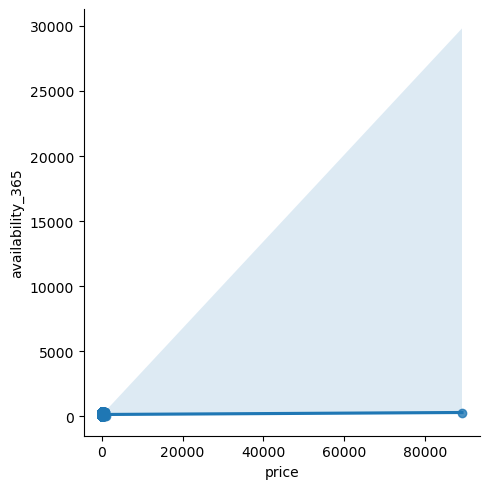

In [19]:
sns.lmplot(x = 'price', y = 'availability_365', data = df_sample)

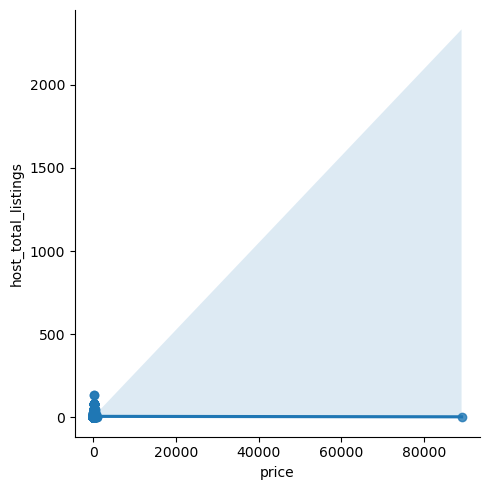

In [20]:
# Create a scatterplot for price and host_total_listings to determine if they have any relationship 
sns.lmplot(x= 'price', y = 'host_total_listings', data = df_sample)

A moderate positive correlation exists between the variables price and availability_365, indicating that these variables tend to increase or decrease together. Similarly, the variables price and host_total_listings demonstrate a moderate positive correlation, implying that an increase in one variable is often accompanied by an increase in the other.

### Pair Plots

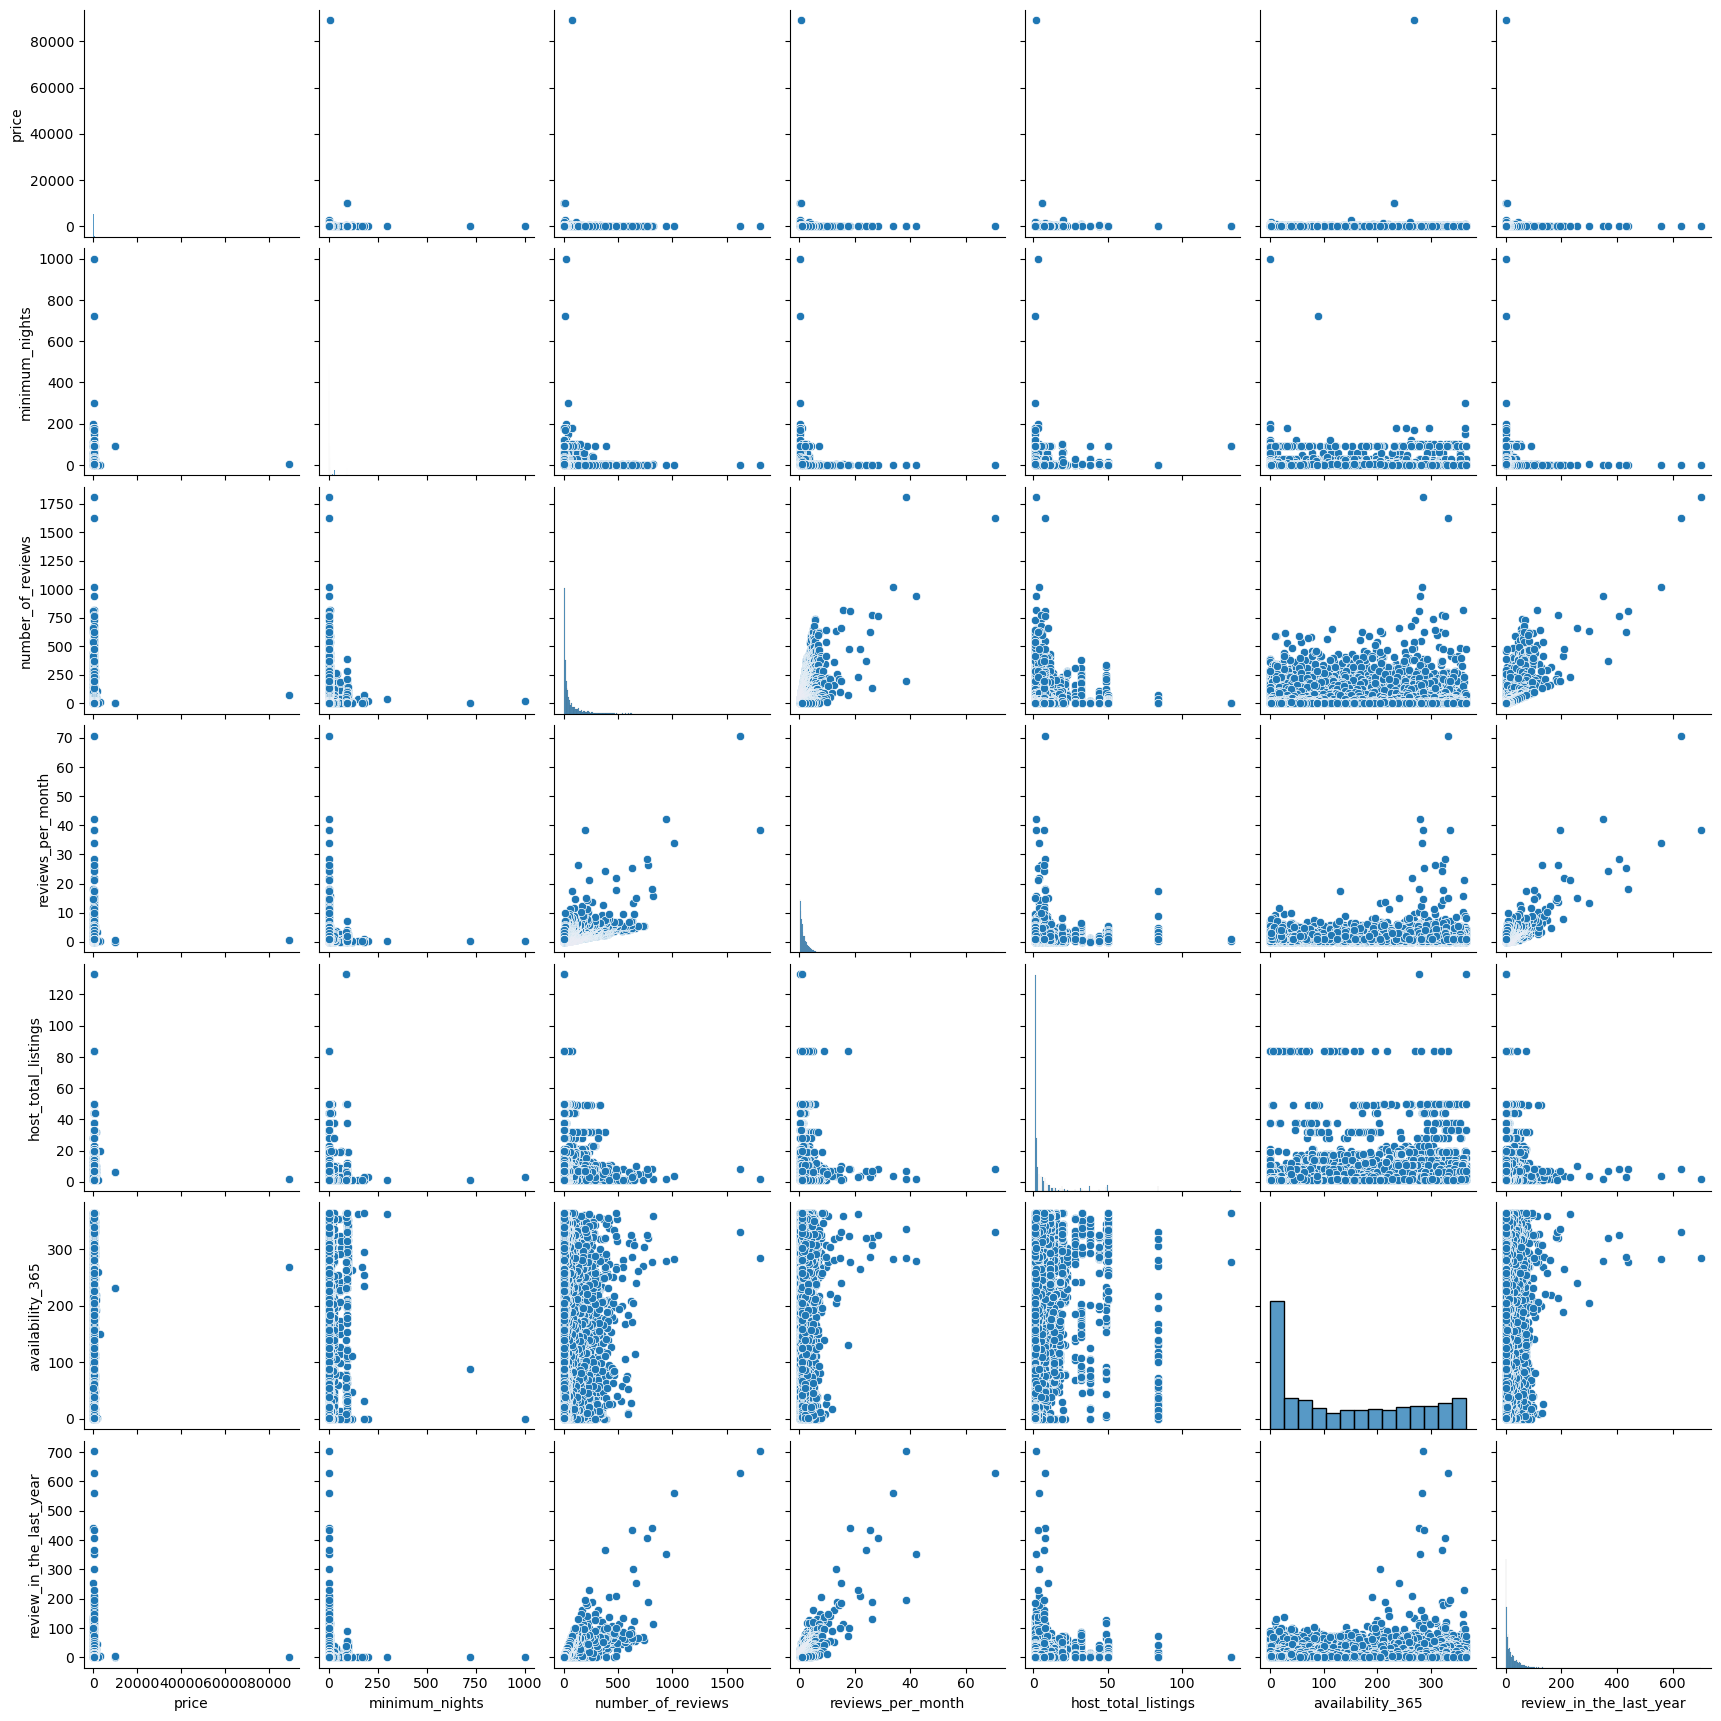

In [21]:
# Create a pair plot

p = sns.pairplot(sub)

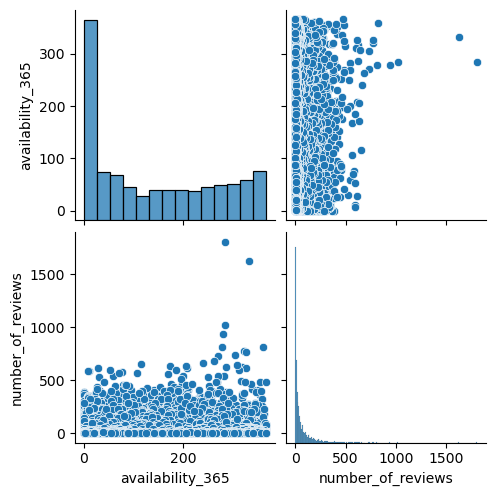

In [22]:
# Create pair plot of availability_365 and number_of reviews

# Create a subset
sub_2 = sub[['availability_365', 'number_of_reviews']]

# Create a pair plot
s = sns.pairplot(sub_2)

Based on the given pair plots, it appears that listings with lower prices tend to have higher values for the variable 'reviews_per_month'. This relationship could be attributed to the fact that these more affordable listings may be more accessible to a larger pool of customers, thereby leading to more frequent bookings and subsequently more reviews.

However, the level of availability of a listing does not appear to be strongly correlated with the number of reviews it receives. This suggests that factors beyond just availability, such as pricing and overall appeal of the listing, may have a greater impact on its popularity among guests.

### Categorical Plots

#### Creating a categorical variable that splits the "Price" column into categories

(0.0, 2000.0)

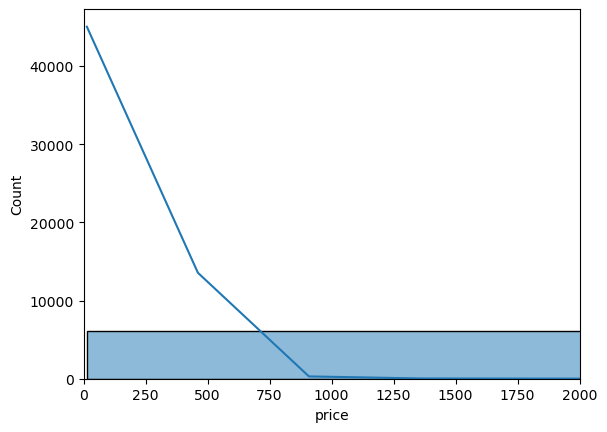

In [23]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_list['price'], bins= 20, kde = True)

plt.xlim(0, 2000)

In [24]:
# Determine the quartile ranges of the 'price' variable 

df_list.price.quantile([0.25,0.5,0.75])

0.25     65.0
0.50     95.0
0.75    144.0
Name: price, dtype: float64

In [25]:
df_list.loc[df_list['price'] < 65, 'price_category'] = 'low_price'

In [26]:
df_list.loc[(df_list['price'] >= 65) & (df_list['price'] < 144), 'price_category'] = 'middle_price'

In [27]:
df_list.loc[df_list['price'] >= 144, 'price_category'] = 'high_price'

In [28]:
df_list['price_category'].value_counts(dropna = False)

middle_price    3072
high_price      1522
low_price       1471
Name: price_category, dtype: int64

In [29]:
df_list.columns

Index(['listing_id', 'listing_name', 'host_id', 'host_name', 'district',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'host_total_listings', 'availability_365',
       'review_in_the_last_year', 'license', 'price_category'],
      dtype='object')

(0.0, 500.0)

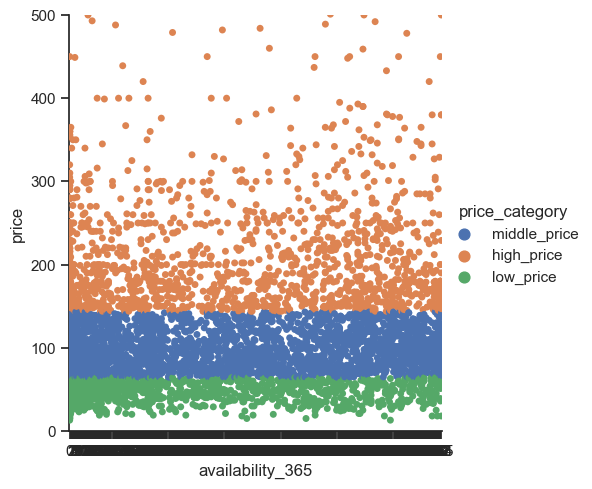

In [30]:
# Create a categorical plot in seaborn using the price categories

sns.set(style = 'ticks')
a_p = sns. catplot(x = 'availability_365', y = 'price', hue = 'price_category', data = df_list)

plt.ylim(0, 500)

(0.0, 500.0)

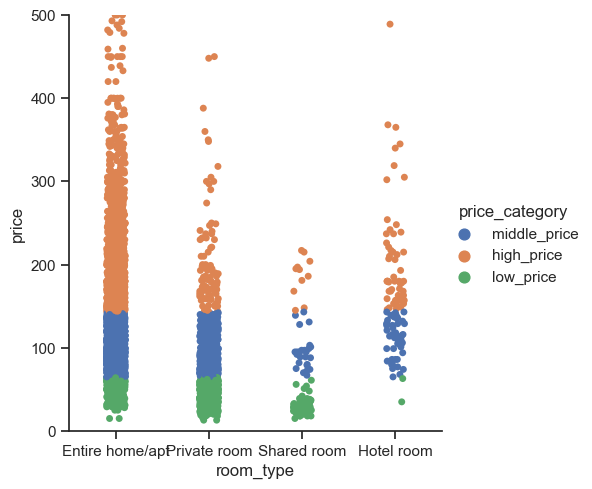

In [31]:
# Create a categorical plot in seaborn using the price categories

sns.set(style= 'ticks')
g = sns.catplot(x= 'room_type', y= 'price', hue= 'price_category', data = df_list)

plt.ylim(0, 500)

(0.0, 500.0)

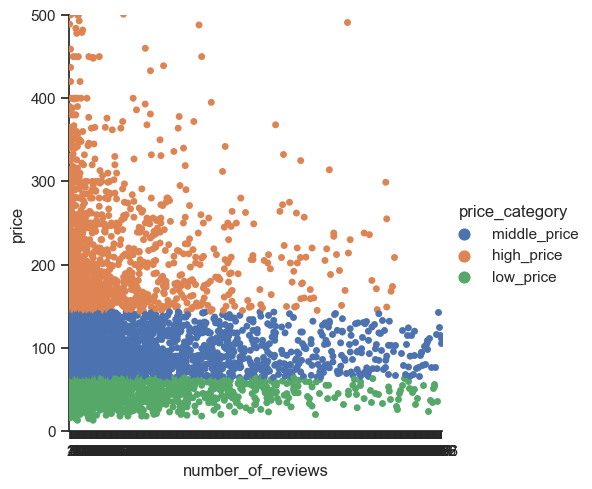

In [32]:
# Create a categorical plot in seaborn using the price categories 

sns.set(style= 'ticks')
r_p = sns.catplot(x= 'number_of_reviews', y= 'price', hue= 'price_category', data= df_list)

plt.ylim(0, 500)

## 5. Answer to the generated questions

### How does the number of reviews for an Airbnb listingin Berlin impact its pricing and popularity among guests?

The number of reviews for an Airbnb listing in Berlin can have a significant impact on both its pricing and popularity among guests. Generally speaking, a higher number of positive reviews will lead to increased demand for a listing and higher prices, while negative reviews or a lack of reviews can have the opposite effect.

One reason for this is that reviews provide valuable information to potential guests about what to expect from a listing. If a listing has many positive reviews, guests will be more likely to trust that it is a good choice and will be willing to pay more for it. On the other hand, if a listing has negative reviews or no reviews at all, guests may be hesitant to book it, and the host may need to lower the price to attract bookings.

### How does the type of room (private room, entire apartment, shared room) impact the pricing of Airbnb listings in Berlin?

The type of room has a significant impact on the pricing of Airbnb listings in Berlin. Entire home/apartment listings are the most expensive, followed by private rooms, hotel rooms, and shared rooms. Entire home/apartment listings offer the most privacy and space, while shared rooms are the least expensive. Other factors such as location, quality, and competition also influence pricing.

## 6. New questions to explore

1. How do location and proximity to attractions, public transport, and restaurants impact the popularity and pricing of Berlin Airbnb listings?

2. How has the growth of Airbnb affected the traditional rental market in Berlin and what are the implications for housing affordability?

## 7. Hypothesis

Hypothesis: It is hypothesized that the host listings for an Airbnb listing in Berlin has a positive impact on its pricing.

The hypothesis is formulated as follows:

#### Null Hypothesis (H0): The number of reviews for an Airbnb listing in Berlin does not affect its pricing.

#### Alternative Hypothesis (HA): The number of reviews for an Airbnb listing in Berlin positively affects its pricing.

## 8. Export data

In [33]:
# Export df_list

df_list.to_csv(os.path.join(path, 'Data','Prepared_Data', 'list_cleaned_2.csv'))

## 9. Export charts

In [34]:
f.savefig(os.path.join(path, 'Visualizations', 'Correlation_Matrix.png'))

In [35]:
g.savefig(os.path.join(path, 'Visualizations', 'room_type and price.png'))

In [36]:
p.savefig(os.path.join(path, 'Visualizations', 'pair_plots.png'))

In [37]:
s.savefig(os.path.join(path, 'Visualizations', 'availability_365 and number_of_reviews.png'))

In [38]:
a_p.savefig(os.path.join(path, 'Visualizations', 'availability and price.png'))

In [39]:
r_p.savefig(os.path.join(path, 'Visualizations', 'reviews and price.png'))